In [127]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

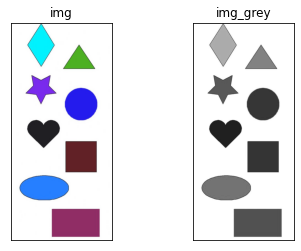

In [161]:
img = cv2.imread('./shapes.jpg')
img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.title("img")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.title("img_grey")
plt.imshow(img_grey, cmap='gray', vmin=0, vmax=255)

In [162]:
_, thresh = cv2.threshold(img_grey,240,255,cv2.THRESH_BINARY)
dilated = cv2.dilate(thresh, None, iterations=3)
contours, _ = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [163]:
delta_x = 15 
delta_y = 30
text_color = (0,0,0)

for contour in contours:
  approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
  cv2.drawContours(img, [approx], 0, (100, 50, 0), 5)
  x = approx.ravel()[0]
  y = approx.ravel()[1] - 5
  if len(approx) == 3:
      cv2.putText(img, "triangle", (x+delta_x, y+delta_y), cv2.FONT_HERSHEY_COMPLEX, 0.5, text_color)
  elif len(approx) == 4:
      x1 ,y1, w, h = cv2.boundingRect(approx)
      aspectRatio = float(w)/h
      if aspectRatio >= 0.95 and aspectRatio <= 1.05:
        cv2.putText(img, "square", (x+delta_x, y+delta_y), cv2.FONT_HERSHEY_COMPLEX, 0.5, text_color)
      else:
        cv2.putText(img, "rectangle", (x+delta_x, y+delta_y), cv2.FONT_HERSHEY_COMPLEX, 0.5, text_color)
  elif len(approx) == 5:
      cv2.putText(img, "pentagon", (x+delta_x, y+delta_y), cv2.FONT_HERSHEY_COMPLEX, 0.5, text_color)
  elif len(approx) == 10:
      cv2.putText(img, "star", (x+delta_x, y+delta_y), cv2.FONT_HERSHEY_COMPLEX, 0.5, text_color)
  else:
      cv2.putText(img, "circle", (x+delta_x, y+delta_y), cv2.FONT_HERSHEY_COMPLEX, 0.5, text_color)

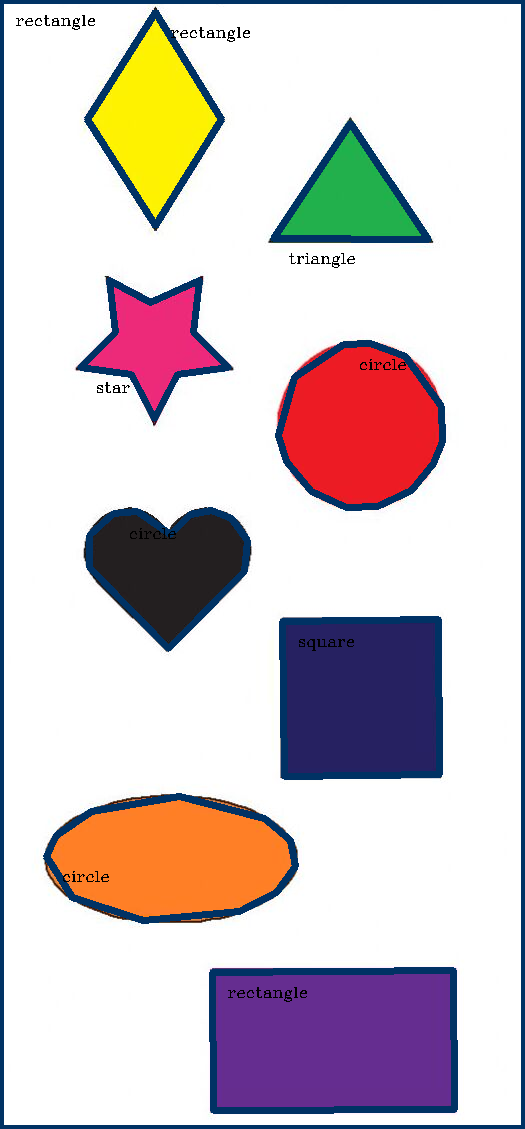

In [164]:
cv2_imshow(img)